In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

[0.9094 0.8847 0.862  0.796  0.6522 0.4304 0.2747 0.2113 0.1424 0.1103
 0.1   ] [7.53589148e+07 4.22995493e+08 1.52975220e+08 6.39647198e+07
 3.13080053e+07 1.91257628e+07 1.37585149e+07 7.22184925e+06
 2.44445984e+06 4.71589694e+05 5.01410076e+04] [0.5696 0.8821 0.877  0.8514 0.7889 0.6693 0.4753 0.3645 0.1976 0.1178
 0.1   ] [4.08410834e+08 4.55698638e+08 1.66686098e+08 7.29007594e+07
 4.00348387e+07 2.65463897e+07 1.73875356e+07 9.27626467e+06
 2.99074612e+06 5.36761378e+05 5.02228080e+04]
[7.53589148e+07 4.22995493e+08 1.52975220e+08 6.39647198e+07
 3.13080053e+07 1.91257628e+07 1.37585149e+07 7.22184925e+06
 2.44445984e+06 4.71589694e+05 5.01410076e+04] [4.08410834e+08 4.55698638e+08 1.66686098e+08 7.29007594e+07
 4.00348387e+07 2.65463897e+07 1.73875356e+07 9.27626467e+06
 2.99074612e+06 5.36761378e+05 5.02228080e+04]
[0.9094 0.8847 0.862  0.796  0.6522 0.4304 0.2747 0.2113 0.1424 0.1103
 0.1   ] [7.53589148e+07 4.22995493e+08 1.52975220e+08 6.39647198e+07
 3.13080053e+07 1.91257

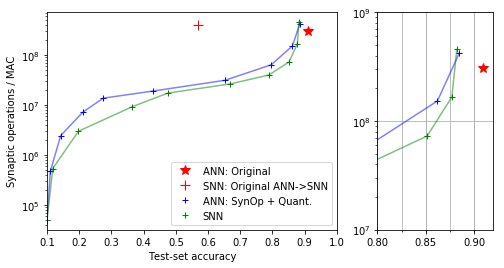

In [37]:
def smooth(series):
    return (series[1:] + series[:-1]) / 2.

def draw_acc(log_file, ax, left=True):
    results = np.atleast_2d(log_file)
    MAC = 306.264576 * 1.e6
    ann_acc = results[:, 0]
    ann_syn = results[:, 1] #/ 1.e5
    snn_acc = results[:, 2]/100
    snn_syn = results[:, 3] #/ 1.e5
#     print(results[:, 0], results[:, 1], results[:, 2], results[:, 3])
    print(ann_acc, ann_syn, snn_acc, snn_syn)
    print(ann_syn, snn_syn)

    ax.plot(ann_acc[0], MAC, 'r*', markersize=10, label="ANN: Original")
    ax.plot(snn_acc[0], snn_syn[0], 'r+', markersize=10, label="SNN: Original ANN->SNN")
#     ax.plot(0.9793, 10.70000 * 1.e5, 'c+', markersize=10, label="SNN: Robust WeightNorm")
#     ax.plot(0.9887, 14.70000 * 1.e5, 'c+', markersize=10)
    ax.plot(ann_acc[1:], ann_syn[1:], 'b+', label="ANN: SynOp + Quant.")
    ax.plot(snn_acc[1:], snn_syn[1:], 'g+', label="SNN")
    ax.plot(ann_acc[1:], ann_syn[1:], 'b', alpha=0.5)
    ax.plot(snn_acc[1:], snn_syn[1:], 'g', alpha=0.5)
    if left:
        ax.legend(loc="lower right")
#         ax.annotate('0.04M, 90.26%', xy=(ann_acc[8], ann_syn[8]),  xycoords='data',
#                 xytext=(0.8, 0.2), textcoords='axes fraction',
#                 horizontalalignment='right', verticalalignment='top', color='Blue'
#                 )
#         ax.annotate('0.17M, 98.46%', xy=(ann_acc[4], ann_syn[4]),  xycoords='data',
#                 xytext=(0.95, 0.45), textcoords='axes fraction',
#                 horizontalalignment='right', verticalalignment='top', color='b'
#                 )
#         ax.annotate('0.4M, 92.34%', xy=(snn_acc[0], snn_syn[0]),  xycoords='data',
#                 xytext=(0.83, 0.65), textcoords='axes fraction',
#                 horizontalalignment='right', verticalalignment='top', color='r'
#                 )
#         ax.annotate('1.07M, 97.93%', xy=(0.9793, 10.70000 * 1.e5),  xycoords='data',
#                 xytext=(0.93, 0.87), textcoords='axes fraction',
#                 horizontalalignment='right', verticalalignment='top', color='c'
#                 )
#         ax.annotate('1.47M, 98.87%', xy=(0.9887, 14.70000 * 1.e5),  xycoords='data',
#                 xytext=(0.93, 0.93), textcoords='axes fraction',
#                 horizontalalignment='right', verticalalignment='top', color='c'
#                 )
#         ax.annotate('1.73M, 99.29%', xy=(ann_acc[0], MAC),  xycoords='data',
#                 xytext=(0.93, 0.98), textcoords='axes fraction',
#                 horizontalalignment='right', verticalalignment='top', color='r'
#                 )
        ax.set_xlim(0.1, 1)
        ax.set_xlabel("Test-set accuracy")
        ax.set_ylabel("Synaptic operations / MAC") #, [$10^5$]

    if not left:    
        ax.grid(True)
        ax.set_xlim(0.8, 0.92)
        ax.set_ylim(1e7, 10e8)
        ax.set_xticks(np.arange(0.80, 0.92, 0.025), minor=True)
        ax.grid(axis='x', markevery=0.01, which='both')

    ax.set_yscale('log')
    
    return results
    
fig, ax = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios': [2.5, 1]})
# f = np.loadtxt("log_200epoch.txt")
# draw_acc(f)
f1 = np.loadtxt("log_lr0.1.txt")
results = draw_acc(f1, ax[0])
draw_acc(f1, ax[1], False)
plt.savefig("analog_CIFAR_scale_down.pdf")

In [14]:
results[:,0]

array([0.9094, 0.8847, 0.862 , 0.796 , 0.6522, 0.4304, 0.2747, 0.2113,
       0.1424, 0.1103, 0.1   ])

In [16]:
results[:,1]

array([7.53589148e+07, 4.22995493e+08, 1.52975220e+08, 6.39647198e+07,
       3.13080053e+07, 1.91257628e+07, 1.37585149e+07, 7.22184925e+06,
       2.44445984e+06, 4.71589694e+05, 5.01410076e+04])

In [17]:
results[:,2]

array([56.96, 88.21, 87.7 , 85.14, 78.89, 66.93, 47.53, 36.45, 19.76,
       11.78, 10.  ])

In [18]:
results[:,3]

array([4.08410834e+08, 4.55698638e+08, 1.66686098e+08, 7.29007594e+07,
       4.00348387e+07, 2.65463897e+07, 1.73875356e+07, 9.27626467e+06,
       2.99074612e+06, 5.36761378e+05, 5.02228080e+04])